# Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về phân loại chất lượng rượu đỏ
---
## 1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu

In [20]:
import pandas as pd

# Đọc dữ liệu
wine_data = pd.read_csv("winequality-red.csv", sep=",")

# Giữ các cột quan trọng
wine_data = wine_data[['alcohol', 'pH', 'sulphates', 'quality']]

# Tạo biến mới: tỷ lệ alcohol trên pH
wine_data['Alcohol_per_pH'] = wine_data['alcohol'] / wine_data['pH']

# Kiểm tra
print(wine_data.head())

   alcohol    pH  sulphates  quality  Alcohol_per_pH
0      9.4  3.51       0.56        5        2.678063
1      9.8  3.20       0.68        5        3.062500
2      9.8  3.26       0.65        5        3.006135
3      9.8  3.16       0.58        6        3.101266
4      9.4  3.51       0.56        5        2.678063


## 2. Trực quan hóa dữ liệu với thư viện Matplotlib

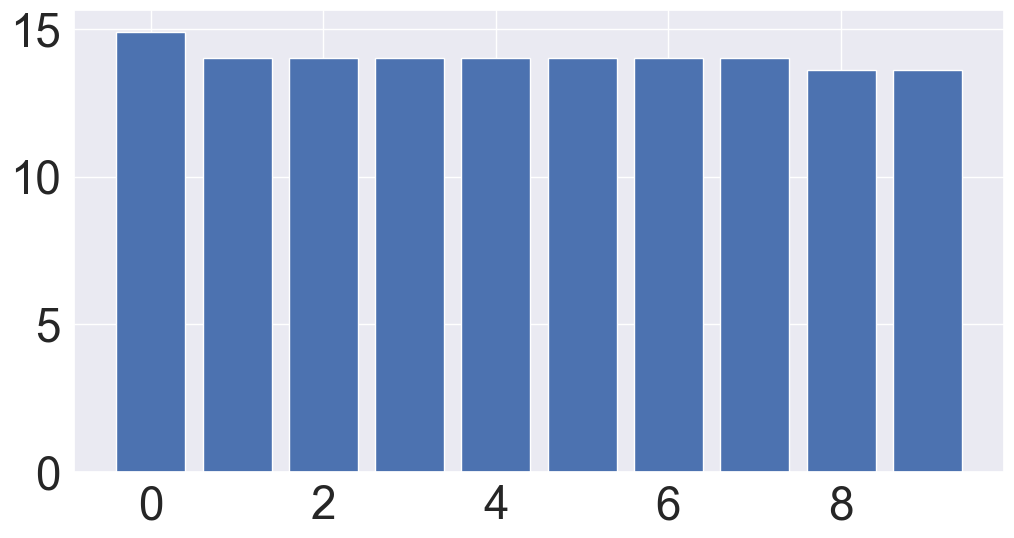

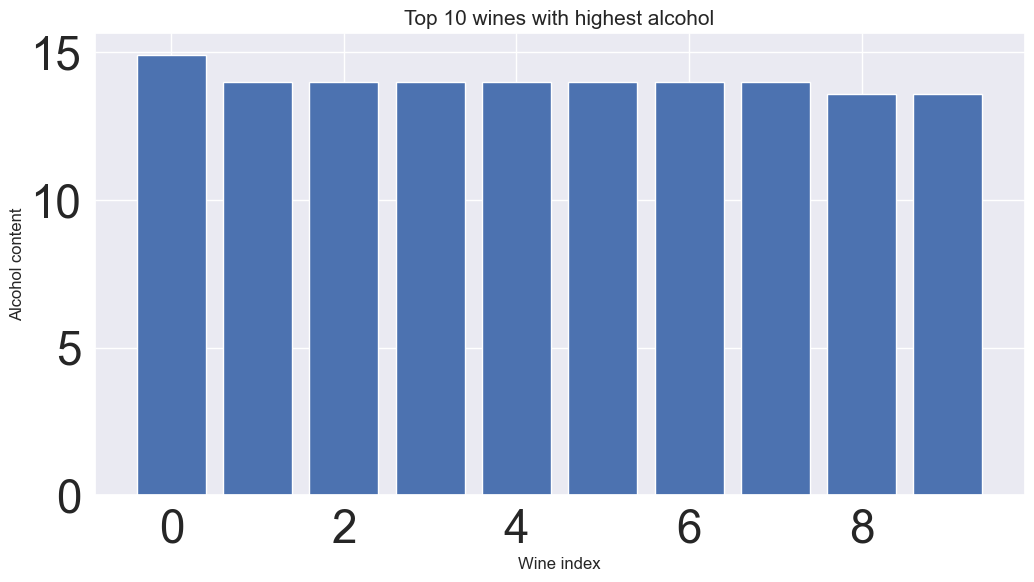

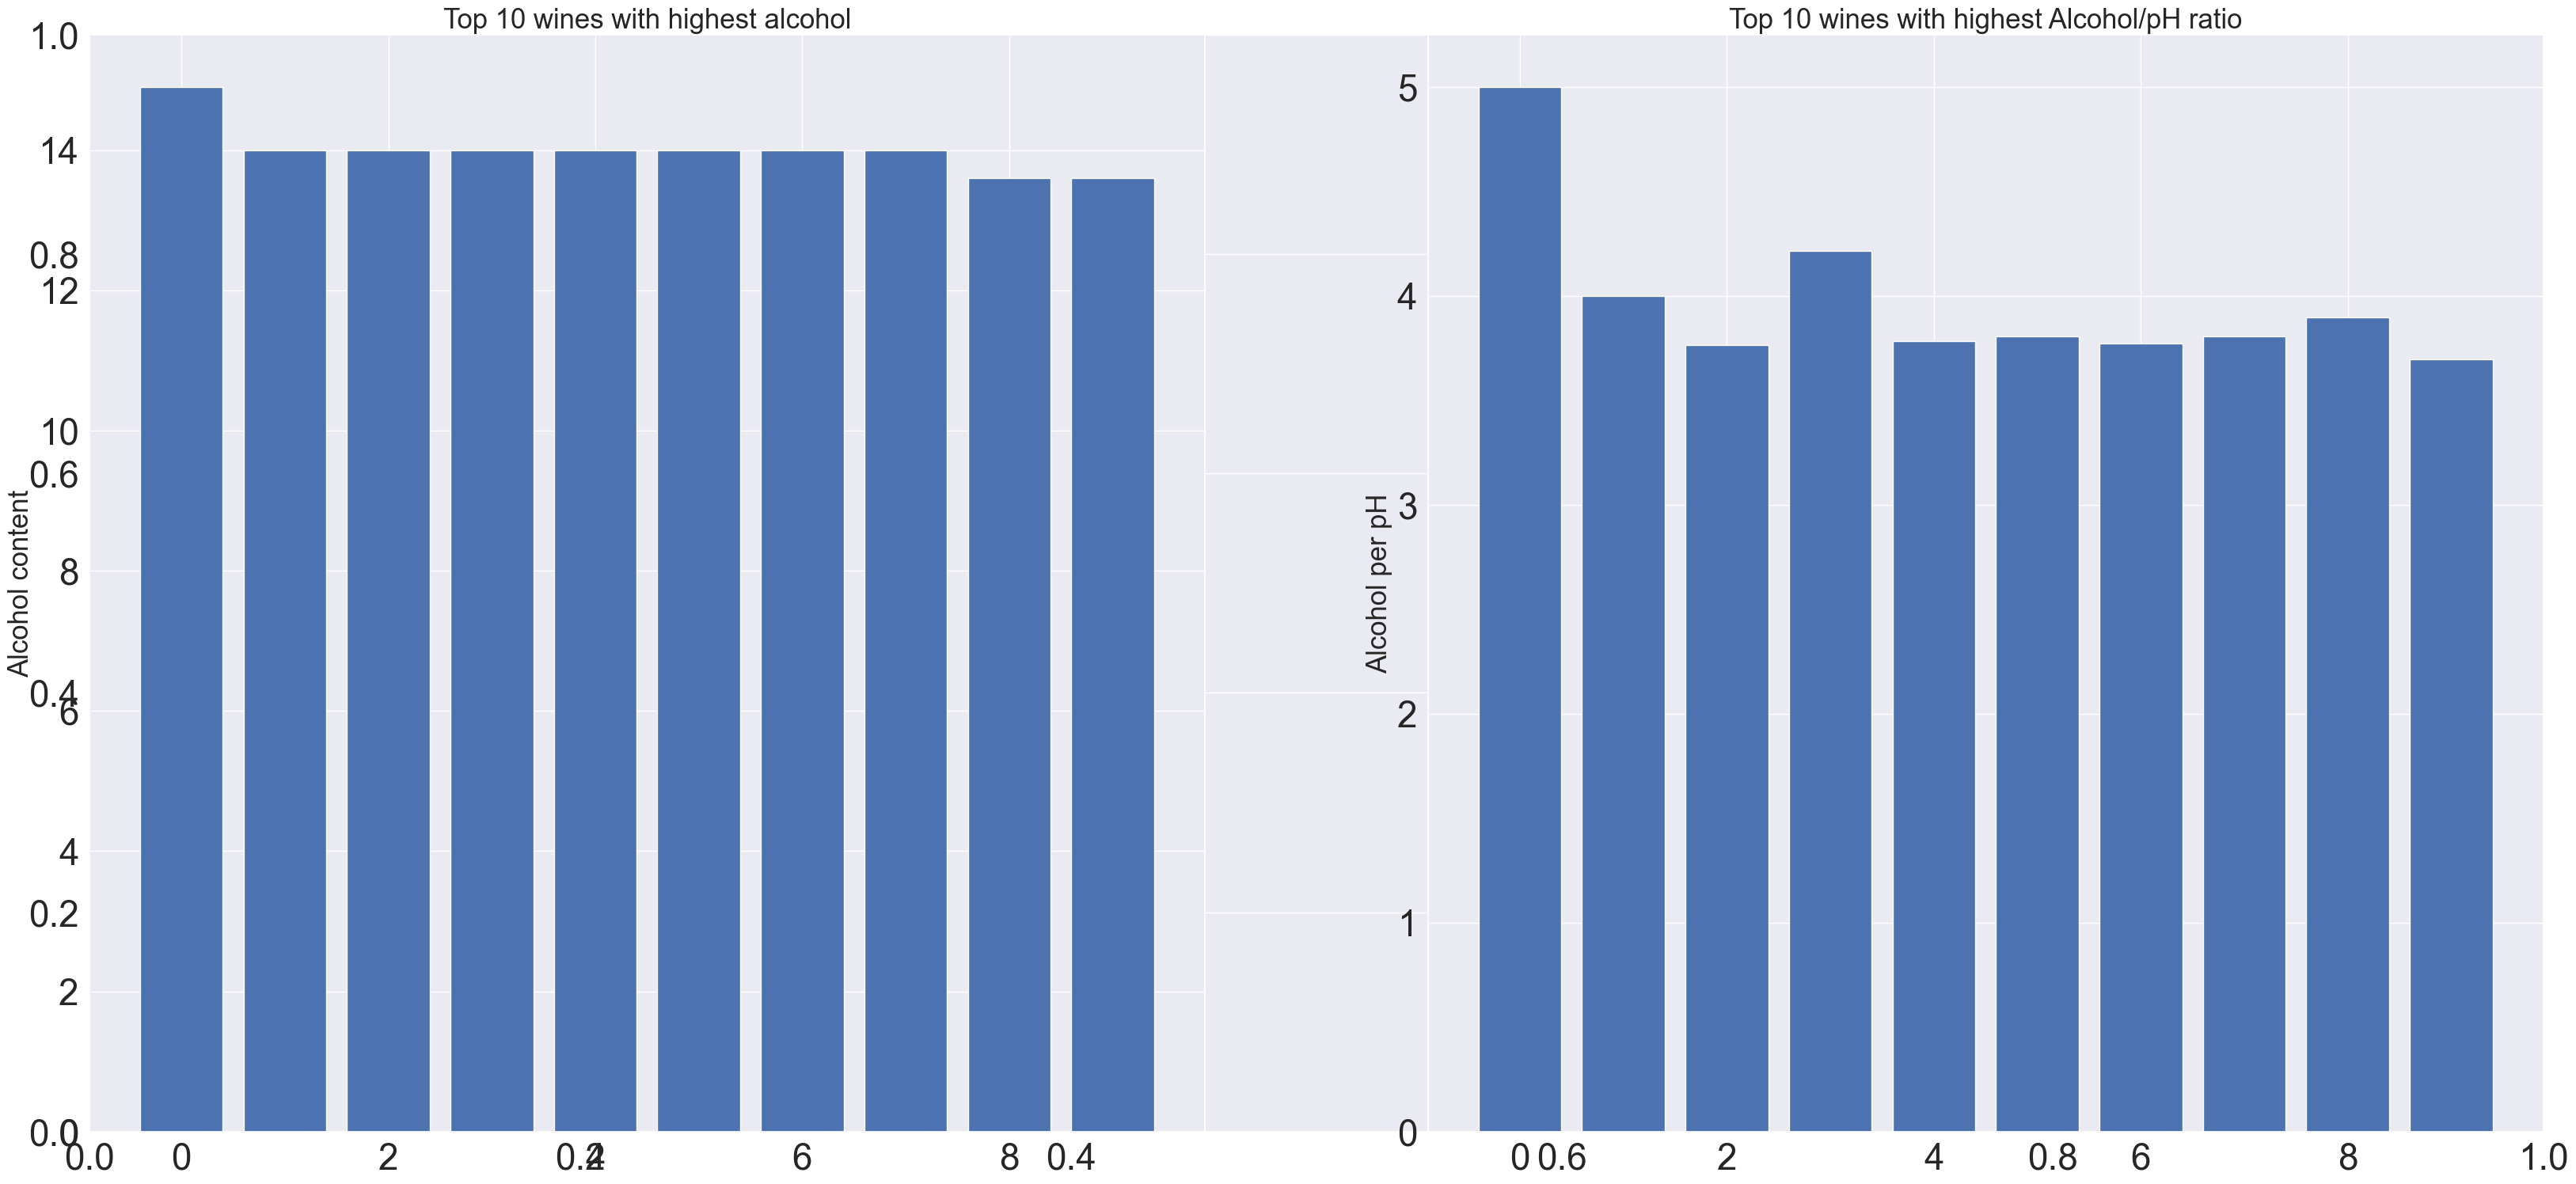

In [22]:
import matplotlib.pyplot as plt

# Sắp xếp theo độ cồn (alcohol) giảm dần
wine_sorted = wine_data.sort_values('alcohol', ascending=False)

# Case 1: Basic
plt.figure(figsize=(12,6))
x = range(10)
y = wine_sorted['alcohol'].head(10)
plt.bar(x, y)
plt.show()

# Case 2: Advanced
plt.figure(figsize=(12,6))
plt.bar(x, y)
plt.title('Top 10 wines with highest alcohol', fontsize=15)
plt.xlabel('Wine index', fontsize=12)
plt.ylabel('Alcohol content', fontsize=12)
plt.show()

# Case 3: So sánh nhiều góc nhìn
fig, ax = plt.subplots(figsize=(40,18))

x = range(10)
y = wine_sorted['alcohol'].head(10)
y1 = wine_sorted['Alcohol_per_pH'].head(10)

plt.subplot(1,2,1)
plt.bar(x, y)
plt.ylabel('Alcohol content', fontsize=25)
plt.title('Top 10 wines with highest alcohol', fontsize=25)

plt.subplot(1,2,2)
plt.bar(x, y1)
plt.ylabel('Alcohol per pH', fontsize=25)
plt.title('Top 10 wines with highest Alcohol/pH ratio', fontsize=25)

plt.show()

## 3. Trực quan hóa dữ liệu với thư viện Seaborn

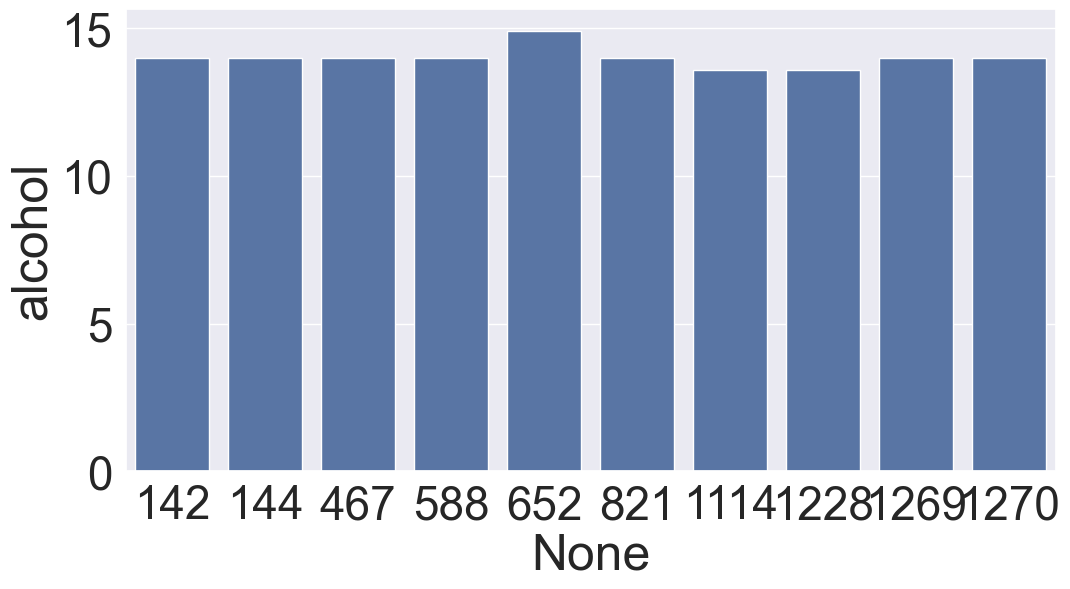

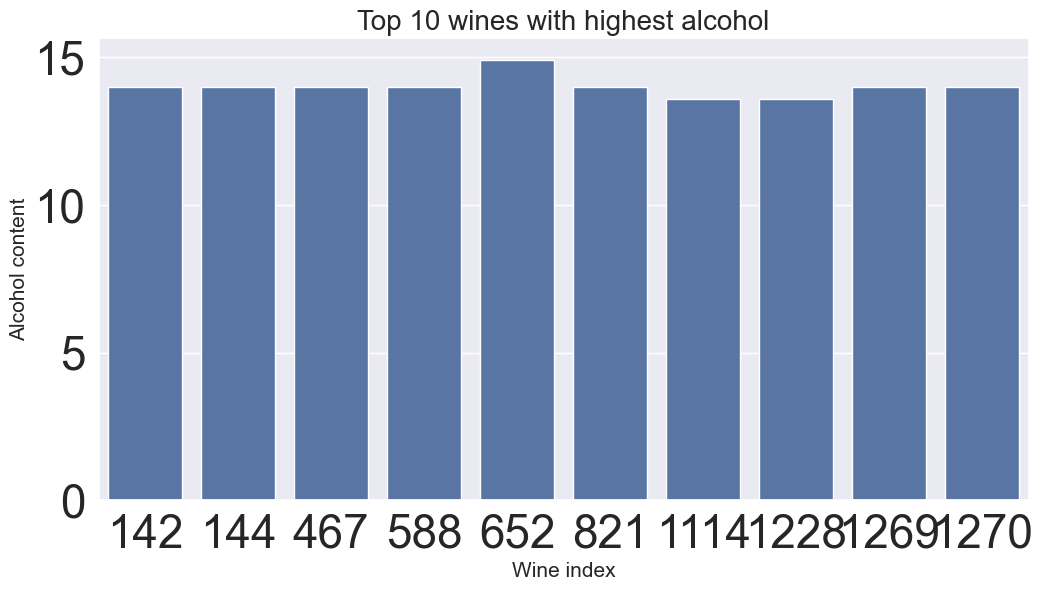

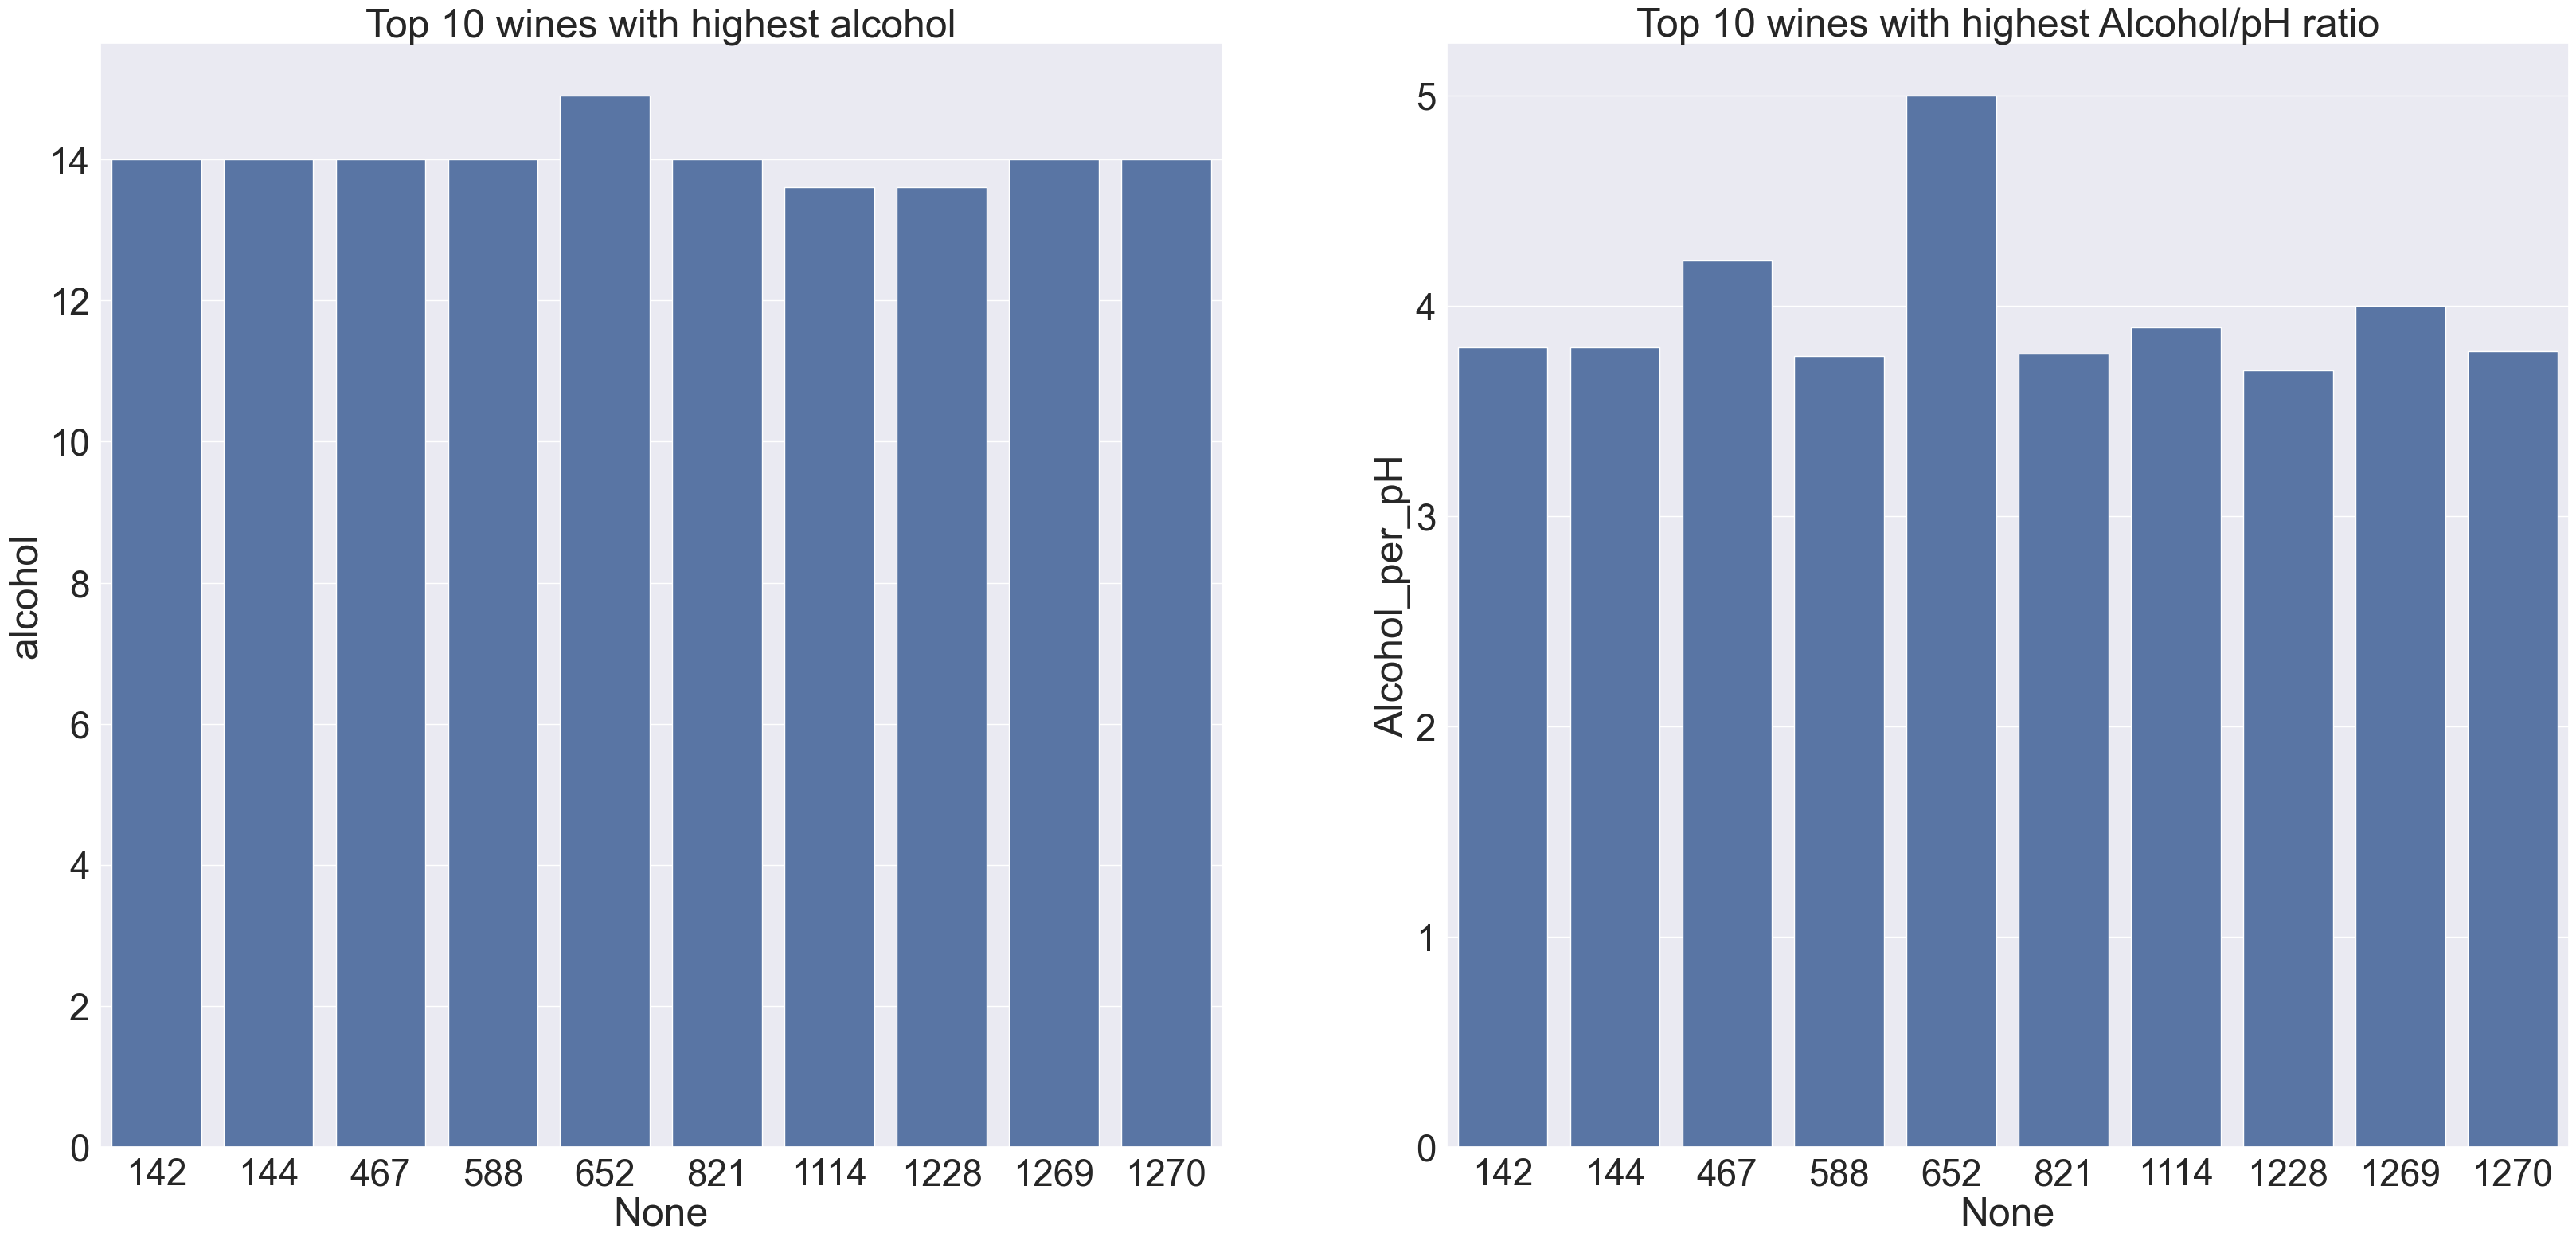

In [23]:
import seaborn as sns
# Case 1: Basic
plt.figure(figsize=(12,6))
data = wine_sorted.head(10)
sns.barplot(data=data, x=data.index, y='alcohol')
plt.show()

# Case 2: Advanced
plt.figure(figsize=(12,6))
data = wine_sorted.head(10)
ax = sns.barplot(data=data, x=data.index, y='alcohol')
ax.set_xlabel('Wine index', fontsize=15)
ax.set_ylabel('Alcohol content', fontsize=15)
ax.set_title('Top 10 wines with highest alcohol', fontsize=20)
plt.show()

# Case 3: Nhiều góc nhìn
fig, ax = plt.subplots(1, 2, figsize=(40,18))
data = wine_sorted.head(10)
sns.set(font_scale=3)

# Biểu đồ 1
ax1 = sns.barplot(data=data, x=data.index, y='alcohol', ax=ax[0])
ax1.set_title('Top 10 wines with highest alcohol')

# Biểu đồ 2
ax2 = sns.barplot(data=data, x=data.index, y='Alcohol_per_pH', ax=ax[1])
ax2.set_title('Top 10 wines with highest Alcohol/pH ratio')

plt.show()

# Kết thúc